In [1]:
import numpy as np
import tensorflow as tf
import keras
from keras.models import load_model
import matplotlib.pyplot as plt

In [2]:
model = load_model("3D_UNet_weights_models_final4_-00026-0.18519.keras", compile=False)

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


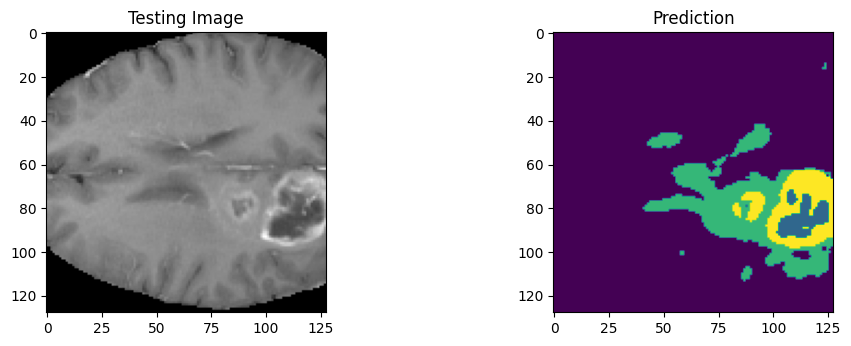

In [3]:
# let's see how the model performs after 1 epoch..
# images, slice_num for prediction...
# (14, 60), (10, 50-60), (9,50), (7, 50-60), (12, 60), (13, 50-60), (15, 40-60), (16, 55-60), (17, 50-60), (18, 55), (19,70 73 75 )
# (21, 60-70), (22, 60), (23, 40-50), (20, 70-80)
val_img = 24
test_img = np.load("D:/deeplearning/deploy_brain_tumor_detector/BraTS_2020/BraTS2020_ValidationData/preprocess_valid/images_val"+str(val_img) + '.npy')
test_img_input = np.expand_dims(test_img, axis=0)
test_img_prediction = model.predict(test_img_input)
test_prediction_argmax = np.argmax(test_img_prediction, axis=4)[0,:,:,:]

# plotting the images

slice_num = 80
plt.figure(figsize=(12, 8))
plt.subplot(221)
plt.title('Testing Image')
plt.imshow(test_img[:,:, slice_num, 1], cmap='grey')
plt.subplot(222)
plt.title("Prediction")
plt.imshow(test_prediction_argmax[:,:, slice_num])
plt.show()